# Options, Payoffs and Combinations

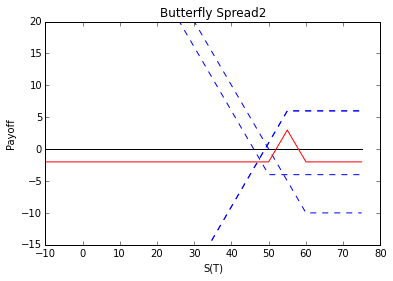

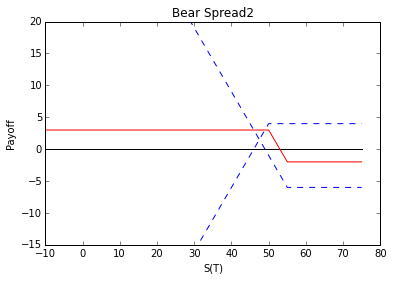

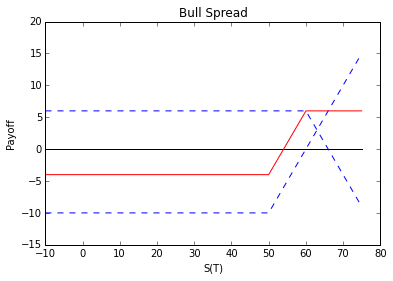

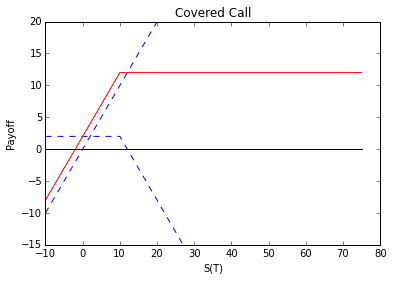

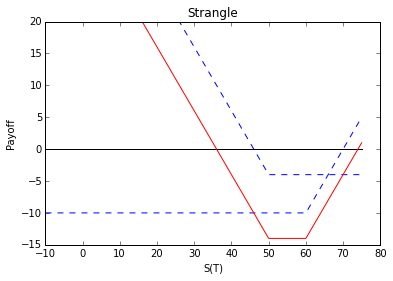

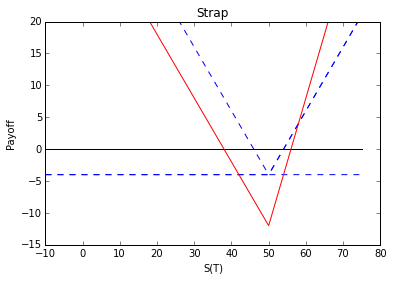

In [2]:
import numpy as np
from functools import wraps, partial

def short(f):
    @wraps(f)
    def wrapper(*args, **kwds):
        return -1.0 * f(*args, **kwds)
    return wrapper

def with_price(f,p):
    @wraps(f)
    def wrapper(*args, **kwds):
        return f(*args, **kwds) - p
    return wrapper

def call_payoff(K, S_T):
    return max(S_T - K, 0.0)

def put_payoff(K, S_T):
    return max(K - S_T, 0.0)

def cash_payoff(C, S_T):
    return C

def stock_payoff(S_T):
    return S_T

def option(option_type, long_short, strike, price):
    option_dict = { ("Call","L") : with_price(partial(call_payoff, strike), price),
                    ("Call","S") : short(with_price(partial(call_payoff, strike), price)),
                    ("Put","L") : with_price(partial(put_payoff, strike), price),
                    ("Put","S") : short(with_price(partial(put_payoff, strike), price)),
        }
    return option_dict[(option_type,long_short)]
    
def payoff_stockprices(payoff, stockprices):
    return np.vectorize(payoff)(stockprices)
    
def sum_payoffs_stockprices(payoffs_stockprices):
    return np.sum(payoffs_stockprices,axis=0)
    
def plot_payoff(strategy):
    zeroes = np.zeros(1000)
    stock_prices = linspace(-10.0, 75.0, 1000)
    figure()
    ylim([-15.0,20.0])
    plot(stock_prices, zeroes,'k')
    payoffs_stockprices = [payoff_stockprices(pf, stock_prices) for pf in strategy["Payoffs"]]
    for pf_sps in payoffs_stockprices:
        plot(stock_prices, pf_sps, 'b--')
    plot(stock_prices,sum_payoffs_stockprices(payoffs_stockprices), 'r')
    xlabel('S(T)')
    ylabel('Payoff')
    title(strategy["Name"])
    show()
    
call1 = option("Call","L",50.0,4.0)
call2 = option("Call","L",55.0, 6.0)
call3 = option("Call","L",60.0, 10.0)
put1 = option("Put","L",50.0,4.0)
put2 = option("Put","L",55.0, 6.0)
put3 = option("Put","L",60.0, 10.0)

stock = stock_payoff
callb1 = option("Call","L", 50.0, 10.0)
callb2 = option("Call","L", 60.0, 6.0)
callc1 = option("Call","L", 10.0, 2.0)
scallc1 = option("Call","S", 10.0, 2.0)

butterfly_spread = {"Name":"Butterfly Spread","Payoffs":[call1, call3] + [short(call2)] *2}
butterfly_spread2 = {"Name":"Butterfly Spread2","Payoffs":[put1, put3] + [short(put2)] *2}
bear_spread = {"Name":"Bear Spread2","Payoffs":[put2 , short(put1)]}
bull_spread = {"Name":"Bull Spread","Payoffs":[callb1, short(callb2)]}
cov_call = {"Name":"Covered Call","Payoffs":[stock, scallc1]}
strangle = {"Name":"Strangle","Payoffs":[call3, put1]}
strap = {"Name":"Strap","Payoffs":[call1, call1, put1]}


plot_payoff(butterfly_spread2)
plot_payoff(bear_spread)
plot_payoff(bull_spread)
plot_payoff(cov_call)
plot_payoff(strangle)
plot_payoff(strap)